In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import json

In [14]:
def load_results(student_width=8, teacher_width=96, epochs=50, augmented=False):
    filename = f"{teacher_width}-to-{student_width}{'-augmented' if augmented else ''}"
    with open(f"{filename}.json", "r") as f:
        results = json.load(f)

    teacher_test_avg = np.empty(epochs)
    teacher_valid_avg = np.empty(epochs)
    student_test_avg = np.empty(epochs)
    student_valid_avg = np.empty(epochs)
    student_no_distillation_test_avg = np.empty(epochs)
    student_no_distillation_valid_avg = np.empty(epochs)

    teacher_test_worst = np.empty(epochs)
    teacher_valid_worst = np.empty(epochs)
    student_test_worst = np.empty(epochs)
    student_valid_worst = np.empty(epochs)
    student_no_distillation_test_worst = np.empty(epochs)
    student_no_distillation_valid_worst = np.empty(epochs)

    for i in range(epochs):
        teacher_test_avg[i] = results["teacher_test"][i]["average"]
        teacher_valid_avg[i] = results["teacher_validation"][i]["average"]
        student_test_avg[i] = results["student_test"][i]["average"]
        student_valid_avg[i] = results["student_validation"][i]["average"]
        student_no_distillation_test_avg[i] = results["student_no_distillation_test"][i]["average"]
        student_no_distillation_valid_avg[i] = results["student_no_distillation_validation"][i]["average"]

        teacher_test_worst[i] = results["teacher_test"][i]["worst"]
        teacher_valid_worst[i] = results["teacher_validation"][i]["worst"]
        student_test_worst[i] = results["student_test"][i]["worst"]
        student_valid_worst[i] = results["student_validation"][i]["worst"]
        student_no_distillation_test_worst[i] = results["student_no_distillation_test"][i]["worst"]
        student_no_distillation_valid_worst[i] = results["student_no_distillation_validation"][i]["worst"]

    per_epoch = pd.DataFrame({
        "Teacher Test (Average)": teacher_test_avg,
        "Teacher Test (Worst-Group)": teacher_test_worst,
        "Teacher Validation (Average)": teacher_valid_avg,
        "Teacher Validation (Worst-Group)": teacher_valid_worst,
        "Student Test (Average)": student_test_avg,
        "Student Test (Worst-Group)": student_test_worst,
        "Student Validation (Average)": student_valid_avg,
        "Student Validation (Worst-Group)": student_valid_worst,
        "Student Test (Average, No Distillation)": student_no_distillation_test_avg,
        "Student Test (Worst-Group, No Distillation)": student_no_distillation_test_worst,
        "Student Validation (Average, No Distillation)": student_no_distillation_valid_avg,
        "Student Validation (Worst-Group, No Distillation)": student_no_distillation_valid_worst,
    })
    
    per_epoch.to_csv(f"{filename}.csv", index=False)
    
    return per_epoch

In [2]:
results96_8 = pd.read_csv("96-to-8.csv")
results96_16 = pd.read_csv("96-to-16.csv")
results96_8_augmented = pd.read_csv("96-to-8-augmented.csv")

## Test Results vs Epoch (96-to-16)

<AxesSubplot:>

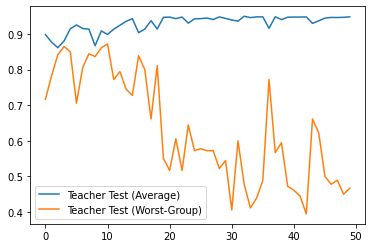

In [18]:
results96_16[["Teacher Test (Average)", "Teacher Test (Worst-Group)"]].plot()

<AxesSubplot:>

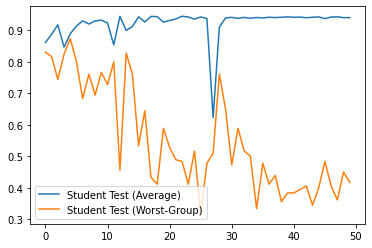

In [19]:
results96_16[["Student Test (Average)", "Student Test (Worst-Group)"]].plot()

<AxesSubplot:>

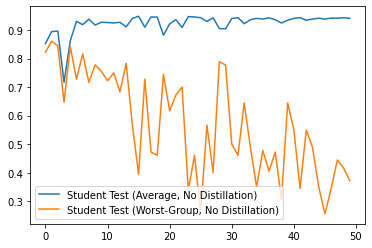

In [20]:
results96_16[["Student Test (Average, No Distillation)", "Student Test (Worst-Group, No Distillation)"]].plot()

### Test Accuracy: Distillation vs No Distillation (96-to-16)

Worst group:

<AxesSubplot:>

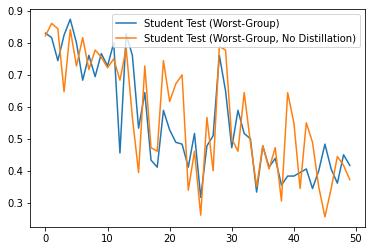

In [30]:
results96_16[["Student Test (Worst-Group)", "Student Test (Worst-Group, No Distillation)"]].plot()

<AxesSubplot:>

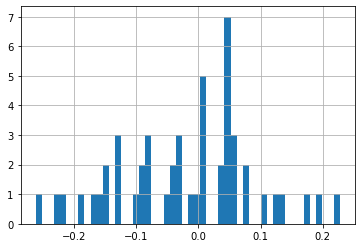

In [31]:
(results96_16["Student Test (Worst-Group)"] - results96_16["Student Test (Worst-Group, No Distillation)"]).hist(bins=50)

Average case:

<AxesSubplot:>

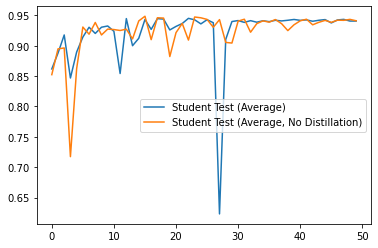

In [32]:
results96_16[["Student Test (Average)", "Student Test (Average, No Distillation)"]].plot()

<AxesSubplot:>

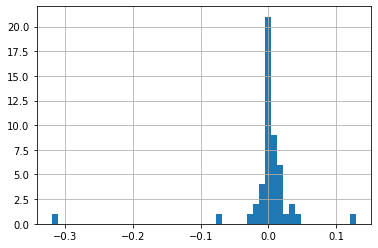

In [33]:
(results96_16["Student Test (Average)"] - results96_16["Student Test (Average, No Distillation)"]).hist(bins=50)

## Test Results vs Epoch (96-to-8)

<AxesSubplot:>

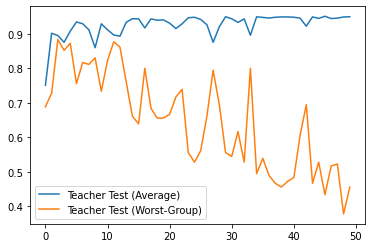

In [15]:
results96_8[["Teacher Test (Average)", "Teacher Test (Worst-Group)"]].plot()

<AxesSubplot:>

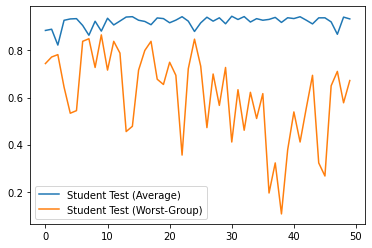

In [16]:
results96_8[["Student Test (Average)", "Student Test (Worst-Group)"]].plot()

<AxesSubplot:>

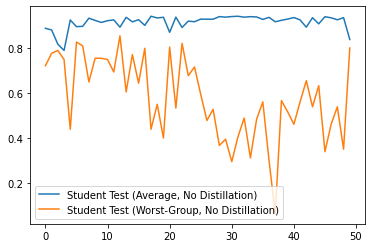

In [17]:
results96_8[["Student Test (Average, No Distillation)", "Student Test (Worst-Group, No Distillation)"]].plot()

### Test Accuracy: Distillation vs No Distillation (96-to-8)

Worst group:

<AxesSubplot:>

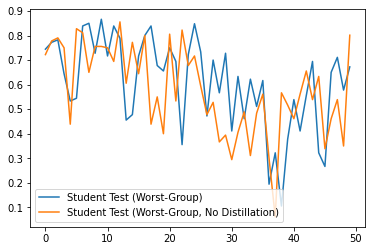

In [24]:
results96_8[["Student Test (Worst-Group)", "Student Test (Worst-Group, No Distillation)"]].plot()

<AxesSubplot:>

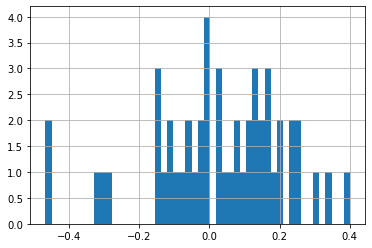

In [27]:
(results96_8["Student Test (Worst-Group)"] - results96_8["Student Test (Worst-Group, No Distillation)"]).hist(bins=50)

Average case:

<AxesSubplot:>

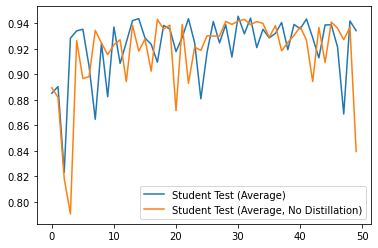

In [29]:
results96_8[["Student Test (Average)", "Student Test (Average, No Distillation)"]].plot()

<AxesSubplot:>

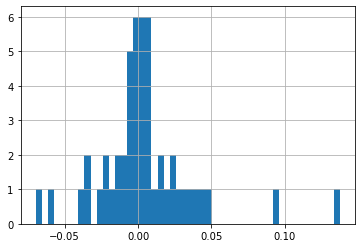

In [28]:
(results96_8["Student Test (Average)"] - results96_8["Student Test (Average, No Distillation)"]).hist(bins=50)

## 96-to-16-to-8 Test Accuracy

<AxesSubplot:>

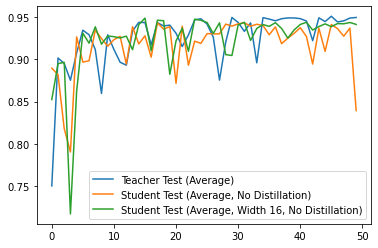

In [11]:
results = results96_8[["Teacher Test (Average)", 
#                        "Student Test (Average)", 
                       "Student Test (Average, No Distillation)"]].copy()
# results["Student Test (Average, Width 16)"] = results96_16["Student Test (Average)"]
results["Student Test (Average, Width 16, No Distillation)"] = results96_16["Student Test (Average, No Distillation)"]

results.plot()

<AxesSubplot:>

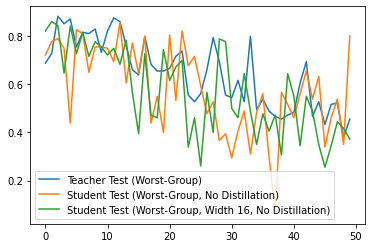

In [12]:
results = results96_8[[
    "Teacher Test (Worst-Group)", 
#     "Student Test (Worst-Group)", 
    "Student Test (Worst-Group, No Distillation)"]].copy()
# results["Student Test (Worst-Group, Width 16)"] = results96_16["Student Test (Worst-Group)"]
results["Student Test (Worst-Group, Width 16, No Distillation)"] = results96_16["Student Test (Worst-Group, No Distillation)"]

results.plot()

# With Augmentation

## Test Results vs Epoch (96-to-8)

<AxesSubplot:>

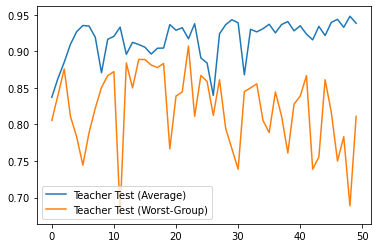

In [17]:
results96_8_augmented[["Teacher Test (Average)", "Teacher Test (Worst-Group)"]].plot()

<AxesSubplot:>

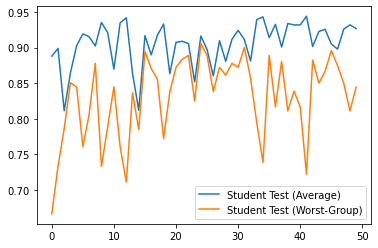

In [19]:
results96_8_augmented[["Student Test (Average)", "Student Test (Worst-Group)"]].plot()

<AxesSubplot:>

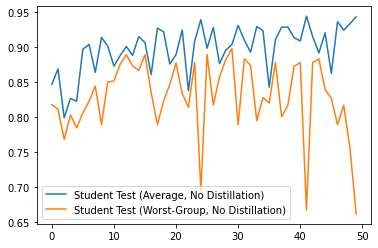

In [20]:
results96_8_augmented[["Student Test (Average, No Distillation)", "Student Test (Worst-Group, No Distillation)"]].plot()

In [20]:
fig = plt.figure(figsize=(50, 50))

<Figure size 3600x3600 with 0 Axes>

<AxesSubplot:>

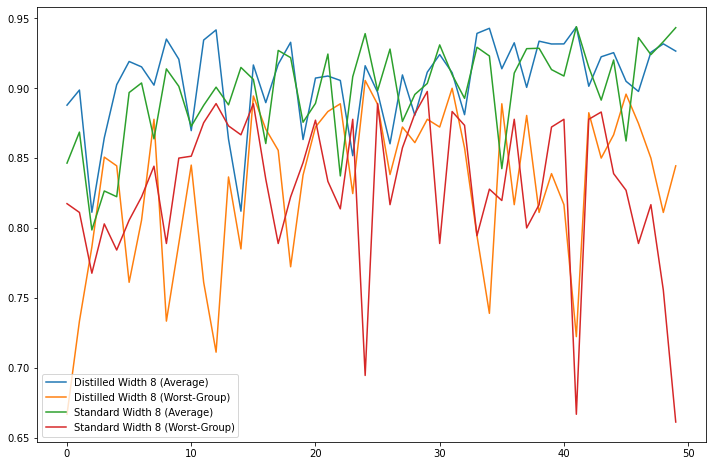

In [28]:
results96_8_augmented[[
    "Student Test (Average)", 
    "Student Test (Worst-Group)",
    "Student Test (Average, No Distillation)", 
    "Student Test (Worst-Group, No Distillation)"
]].rename(columns={
    "Student Test (Average)": "Distilled Width 8 (Average)",
    "Student Test (Worst-Group)": "Distilled Width 8 (Worst-Group)",
    "Student Test (Average, No Distillation)":  "Standard Width 8 (Average)", 
    "Student Test (Worst-Group, No Distillation)": "Standard Width 8 (Worst-Group)",
}).plot(figsize=(12,8))

### Test Accuracy: Distillation vs No Distillation (96-to-8)

Worst group:

<AxesSubplot:>

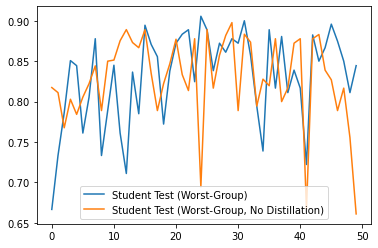

In [21]:
results96_8_augmented[["Student Test (Worst-Group)", "Student Test (Worst-Group, No Distillation)"]].plot()

<AxesSubplot:>

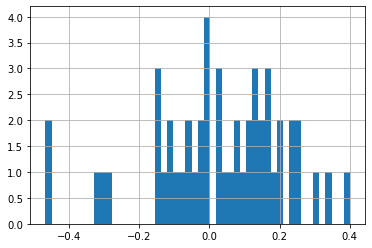

In [27]:
(results96_8_augmented["Student Test (Worst-Group)"] - results96_8_augmented["Student Test (Worst-Group, No Distillation)"]).hist(bins=50)

Average case:

<AxesSubplot:>

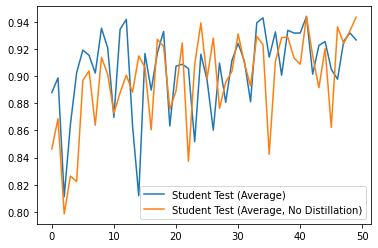

In [22]:
results96_8_augmented[["Student Test (Average)", "Student Test (Average, No Distillation)"]].plot()

<AxesSubplot:>

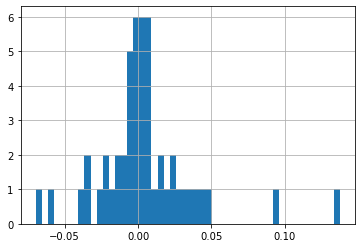

In [28]:
(results96_8_augmented["Student Test (Average)"] - results96_8_augmented["Student Test (Average, No Distillation)"]).hist(bins=50)

In [7]:
results96_8.loc[40:, ["Student Test (Worst-Group)", "Student Test (Worst-Group, No Distillation)"]].mean()

Student Test (Worst-Group)                     0.540000
Student Test (Worst-Group, No Distillation)    0.534016
dtype: float64

In [8]:
results96_8.loc[40:, ["Student Test (Average)", "Student Test (Average, No Distillation)"]].mean()

Student Test (Average)                     0.926375
Student Test (Average, No Distillation)    0.918430
dtype: float64

In [10]:
results96_8_augmented.loc[40:, ["Student Test (Worst-Group)", "Student Test (Worst-Group, No Distillation)"]].mean()

Student Test (Worst-Group)                     0.841413
Student Test (Worst-Group, No Distillation)    0.799327
dtype: float64

In [9]:
results96_8_augmented.loc[40:, ["Student Test (Average)", "Student Test (Average, No Distillation)"]].mean()

Student Test (Average)                     0.921165
Student Test (Average, No Distillation)    0.917869
dtype: float64

<AxesSubplot:title={'center':'Test Results (Width 8 model from Sagawa et al.)'}>

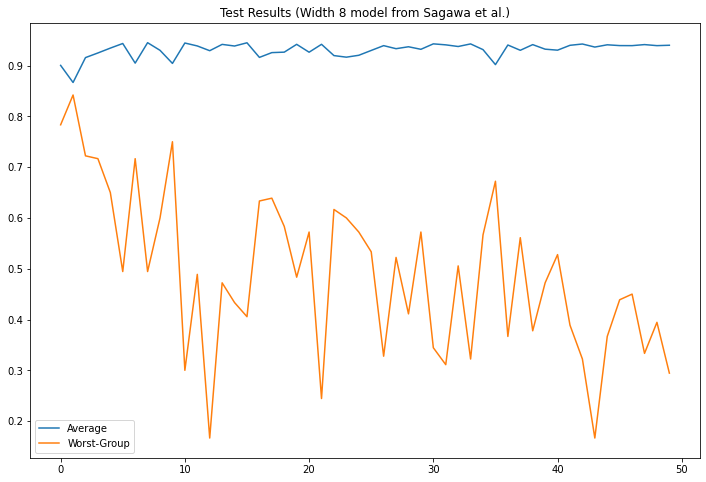

In [62]:
sagawa_8 = pd.read_csv("sagawa-8.csv")

groups = [f"avg_acc_group:{i}" for i in range(4)]

sagawa_8["Average"] = sagawa_8.avg_acc
sagawa_8["Worst-Group"] = sagawa_8[groups].min(axis=1)

sagawa_8[["Average", "Worst-Group"]].plot(figsize=(12,8), title="Test Results (Width 8 model from Sagawa et al.)")

In [64]:
sagawa_96 = pd.read_csv("sagawa-96.csv")

groups = [f"avg_acc_group:{i}" for i in range(4)]

sagawa_96["96-Width (Average)"] = sagawa_96.avg_acc
sagawa_96["96-Width (Worst-Group)"] = sagawa_96[groups].min(axis=1)

/home/nils/.anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:title={'center':'Test Results from Sagawa et al.'}>

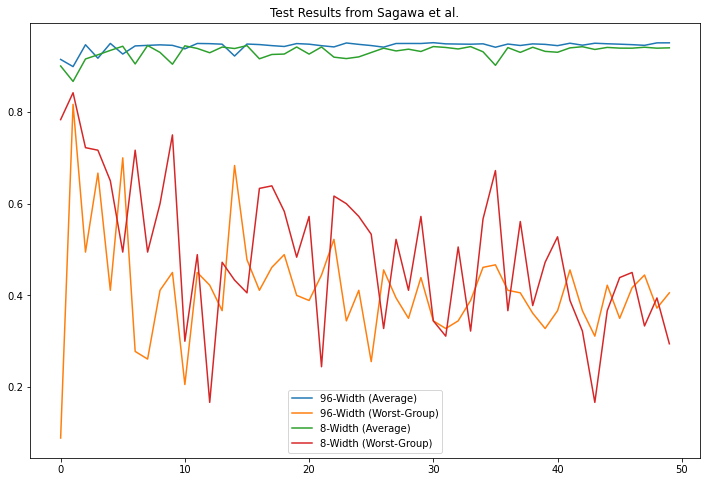

In [65]:
results = sagawa_96[["96-Width (Average)", "96-Width (Worst-Group)"]]
results[["8-Width (Average)", "8-Width (Worst-Group)"]] = sagawa_8[["Average", "Worst-Group"]]

results.plot(figsize=(12,8), title="Test Results from Sagawa et al.")

<AxesSubplot:>

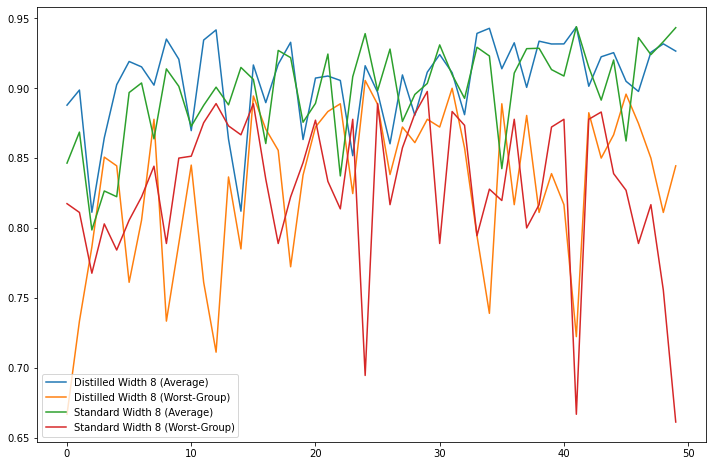

In [13]:
temp = results96_8_augmented[[
    "Student Test (Worst-Group)",
    "Student Test (Worst-Group, No Distillation)"
]].copy().rename(columns={
    "Student Test (Worst-Group)": "SWD",
    "Student Test (Worst-Group, No Distillation)": "SW",
})

temp["epoch"] = temp.index.values + 1

In [22]:
distillation = smf.ols('SWD ~ epoch', data=temp).fit()
results96_8_augmented["SWD"] = distillation.predict()
no_distillation = smf.ols('SW ~ epoch', data=temp).fit()
results96_8_augmented["SW"] = no_distillation.predict()

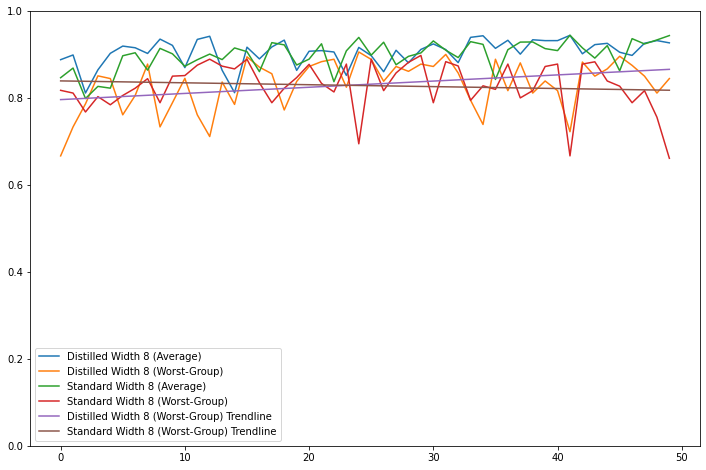

In [34]:
temp = results96_8_augmented[[
    "Student Test (Average)", 
    "Student Test (Worst-Group)",
    "Student Test (Average, No Distillation)", 
    "Student Test (Worst-Group, No Distillation)",
    "SWD",
    "SW"
]].rename(columns={
    "Student Test (Average)": "Distilled Width 8 (Average)",
    "Student Test (Worst-Group)": "Distilled Width 8 (Worst-Group)",
    "Student Test (Average, No Distillation)":  "Standard Width 8 (Average)", 
    "Student Test (Worst-Group, No Distillation)": "Standard Width 8 (Worst-Group)",
    "SWD": "Distilled Width 8 (Worst-Group) Trendline",
    "SW": "Standard Width 8 (Worst-Group) Trendline"
})

ax = temp.plot(figsize=(12,8))
ax.set_ylim(0, 1)
plt.savefig("augmentation.png")

In [35]:
results96_8_augmented.loc[40:, ["Teacher Test (Average)", "Teacher Test (Worst-Group)"]].mean()

Teacher Test (Average)        0.933173
Teacher Test (Worst-Group)    0.791111
dtype: float64